In [1]:
import os
import shutil
import zipfile

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = zipfile.ZipFile("./rps-validation.zip","r")
file.extractall("./sps")

In [4]:
train_file = "./sps/train/"
test_file  = "./sps/test/"

In [7]:
print("\nTrain Data Details : \n=========================")
for i in os.listdir(train_file):
    print("Total files in %s folder is : %d"%(i,len(os.listdir(train_file+i))))
print("\nTest Data Details : \n=========================")
for i in os.listdir(test_file):
    print("Total files in %s folder is : %d"%(i,len(os.listdir(test_file+i))))


Train Data Details : 
Total files in paper folder is : 9
Total files in rock folder is : 9
Total files in scissor folder is : 9

Test Data Details : 
Total files in paper folder is : 2
Total files in rock folder is : 2
Total files in scissor folder is : 2


In [8]:
#300 * 300 -> Image Size

In [9]:
import tensorflow as tf

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen  = ImageDataGenerator(rescale=1.0 / 25.0)

In [13]:
train_data = train_datagen.flow_from_directory(train_file,target_size=(300,300),batch_size=3,class_mode="categorical")
test_data  = test_datagen.flow_from_directory(test_file,target_size=(300,300),batch_size=3,class_mode="categorical")

Found 27 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [28]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,300,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [29]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

In [30]:
model1.fit(train_data,steps_per_epoch=3,epochs=50,validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 2 steps
Epoch 1/50
3/3 [==============================] - 11s 4s/step - loss: 874.0881 - acc: 0.3333 - val_loss: 4408.6239 - val_acc: 0.3333
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 237.5029 - acc: 0.4444 - val_loss: 2636.2075 - val_acc: 0.3333
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 152.2162 - acc: 0.4444 - val_loss: 996.3454 - val_acc: 0.3333
Epoch 4/50
3/3 [==============================] - 3s 995ms/step - loss: 170.1855 - acc: 0.4444 - val_loss: 319.3329 - val_acc: 0.3333
Epoch 5/50
3/3 [==============================] - 3s 992ms/step - loss: 31.0595 - acc: 0.4444 - val_loss: 2299.0670 - val_acc: 0.3333
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 221.6640 - acc: 0.2222 - val_loss: 877.4054 - val_acc: 0.3333
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 94.7542 - acc: 0.4444 - val_loss: 802.9535 - v

In [32]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

model2.fit(train_data,steps_per_epoch=9,epochs=10,validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 9 steps, validate for 2 steps
Epoch 1/10
9/9 [==============================] - 9s 1s/step - loss: 30.8280 - acc: 0.3704 - val_loss: 9.2424 - val_acc: 0.3333
Epoch 2/10
9/9 [==============================] - 7s 826ms/step - loss: 1.1255 - acc: 0.4074 - val_loss: 0.9519 - val_acc: 0.8333
Epoch 3/10
9/9 [==============================] - 7s 830ms/step - loss: 1.4919 - acc: 0.7407 - val_loss: 16.0142 - val_acc: 0.3333
Epoch 4/10
9/9 [==============================] - 8s 841ms/step - loss: 0.8115 - acc: 0.7407 - val_loss: 5.1344 - val_acc: 0.5000
Epoch 5/10
9/9 [==============================] - 8s 861ms/step - loss: 0.3283 - acc: 0.8148 - val_loss: 15.5557 - val_acc: 0.3333
Epoch 6/10
9/9 [==============================] - 7s 830ms/step - loss: 0.1862 - acc: 0.9259 - val_loss: 10.7546 - val_acc: 0.6667
Epoch 7/10
9/9 [==============================] - 8s 855ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 14.2964 - val_acc: 0.666

In [33]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale=1.0 / 25.0)

train_data = train_datagen.flow_from_directory(train_file,target_size=(300,300),batch_size=3,class_mode="categorical")
test_data  = test_datagen.flow_from_directory(test_file,target_size=(300,300),batch_size=3,class_mode="categorical")

Found 27 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [34]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.categorical_crossentropy,metrics=['acc'])

model3.fit(train_data,steps_per_epoch=9,epochs=10,validation_data=test_data)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 9 steps, validate for 2 steps
Epoch 1/10
9/9 [==============================] - 9s 1s/step - loss: 11.6649 - acc: 0.2222 - val_loss: 0.9277 - val_acc: 0.6667
Epoch 2/10
9/9 [==============================] - 8s 877ms/step - loss: 1.1370 - acc: 0.2963 - val_loss: 0.9891 - val_acc: 0.3333
Epoch 3/10
9/9 [==============================] - 8s 871ms/step - loss: 1.1784 - acc: 0.4444 - val_loss: 6.6467 - val_acc: 0.3333
Epoch 4/10
9/9 [==============================] - 8s 877ms/step - loss: 1.3286 - acc: 0.3704 - val_loss: 13.7895 - val_acc: 0.3333
Epoch 5/10
9/9 [==============================] - 8s 887ms/step - loss: 1.0154 - acc: 0.5185 - val_loss: 38.0181 - val_acc: 0.3333
Epoch 6/10
9/9 [==============================] - 8s 864ms/step - loss: 1.4957 - acc: 0.4444 - val_loss: 3.3821 - val_acc: 0.6667
Epoch 7/10
9/9 [==============================] - 8s 878ms/step - loss: 1.0588 - acc: 0.5185 - val_loss: 5.9131 - val_acc: 0.3333


In [35]:
img = "./sps/train/rock/rock1.png"

In [36]:
import cv2

In [37]:
img = cv2.imread(img)

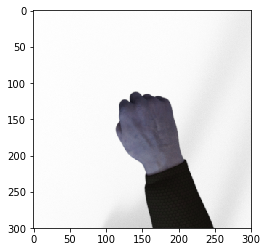

In [38]:
plt.imshow(img)

In [39]:
img.shape

(300, 300, 3)

In [42]:
model3.predict_classes(img.reshape((1,300,300,3)))

array([0], dtype=int64)

In [43]:
model2.predict_classes(img.reshape((1,300,300,3)))

array([1], dtype=int64)

In [44]:
model1.predict_classes(img.reshape((1,300,300,3)))

array([0], dtype=int64)

In [53]:
def predict(DIR="./sps/test/",model=model2):
    className = ['paper','rock','scissor']
    for i in os.listdir(DIR):
        for j in os.listdir(DIR+i):
            img = cv2.imread(DIR+i+"/"+j)
            img = cv2.resize(img,(300,300))
            pred = model.predict_classes(img.reshape((1,300,300,3)))[0]
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
            plt.title(className[pred])
            plt.show()

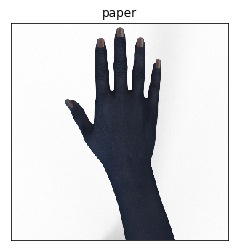

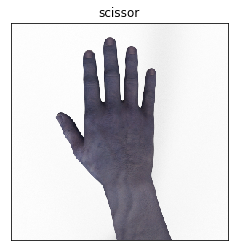

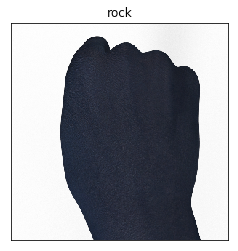

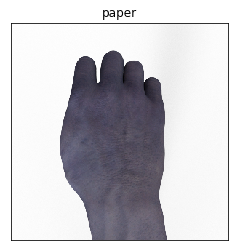

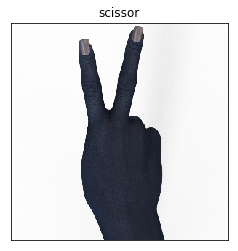

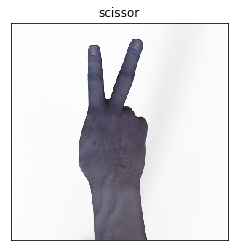

In [59]:
predict(model=model2)

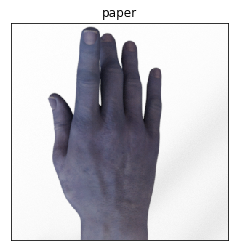

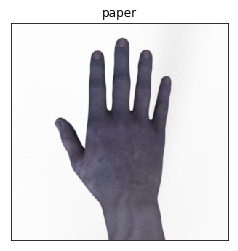

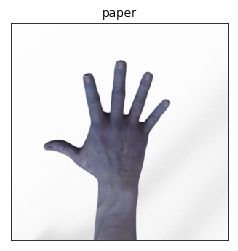

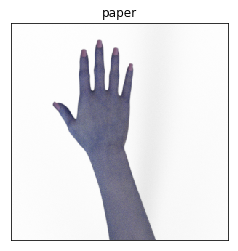

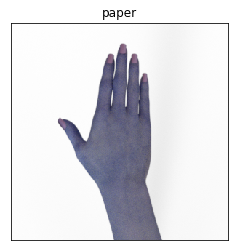

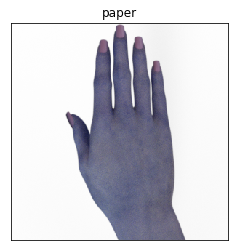

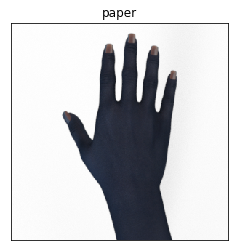

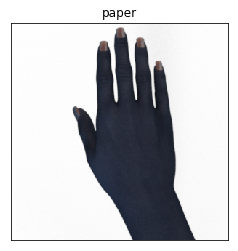

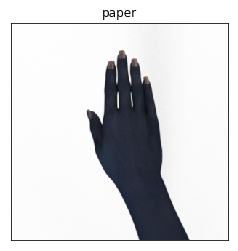

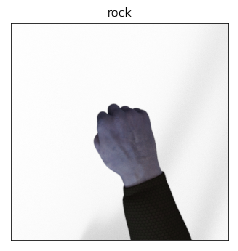

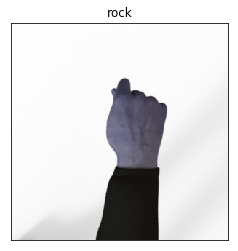

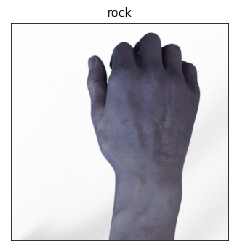

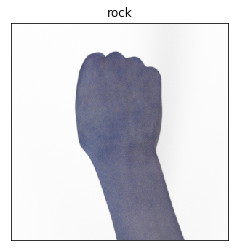

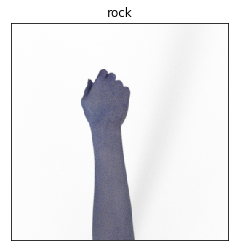

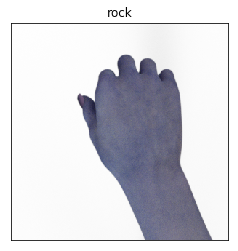

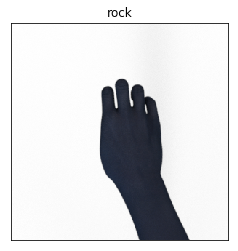

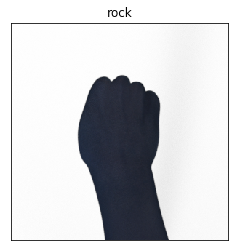

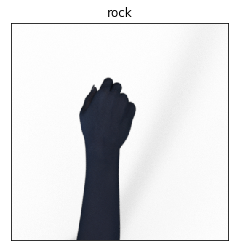

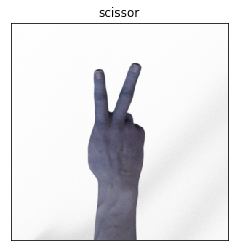

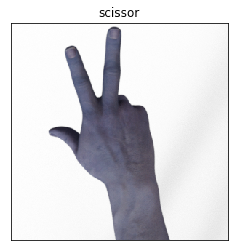

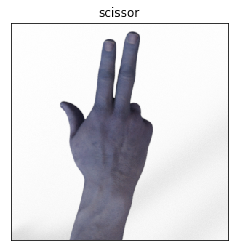

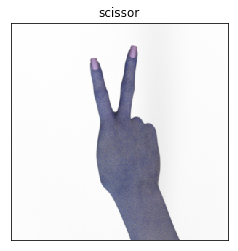

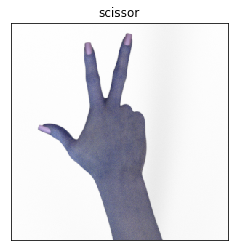

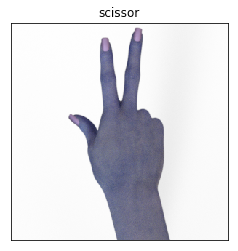

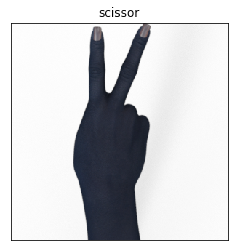

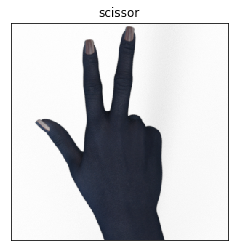

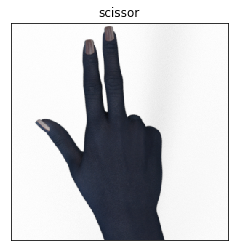

In [60]:
predict(DIR=train_file,model=model2)

In [63]:
#predict(DIR=train_file,model=model1)

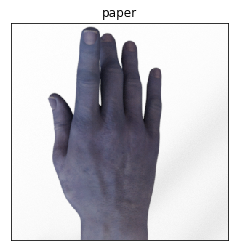

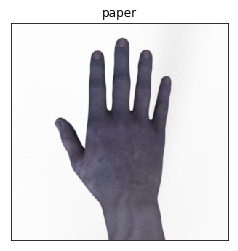

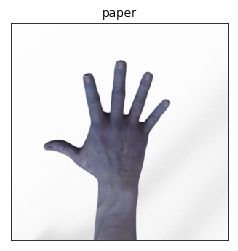

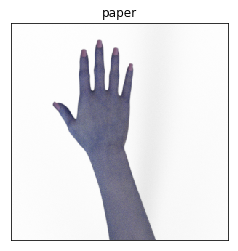

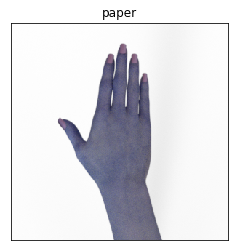

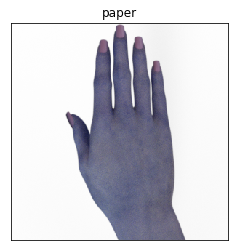

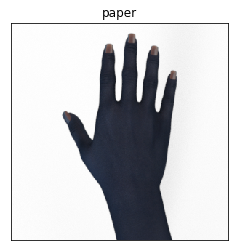

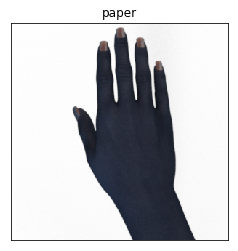

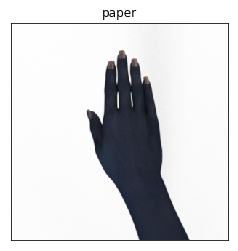

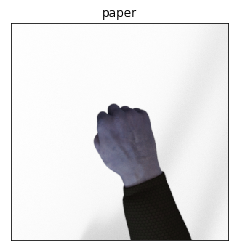

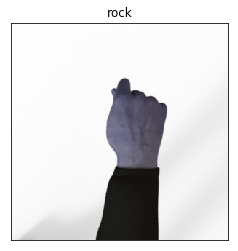

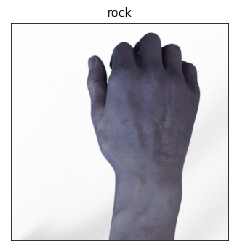

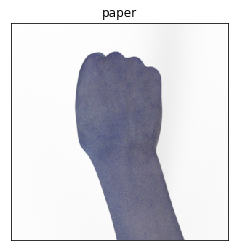

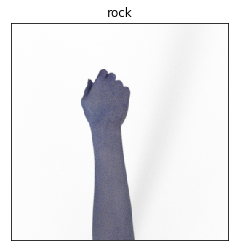

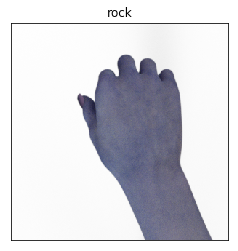

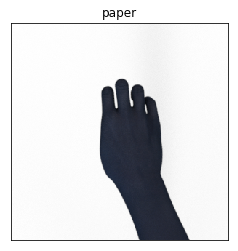

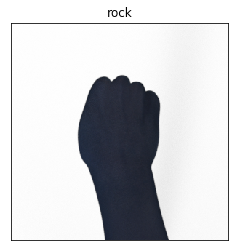

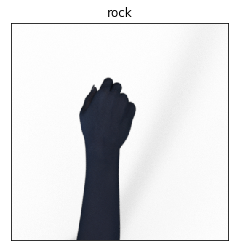

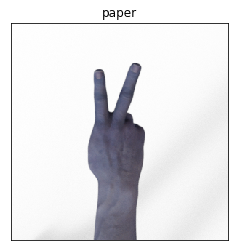

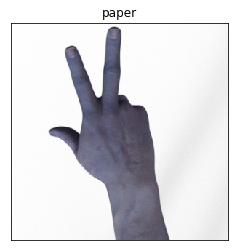

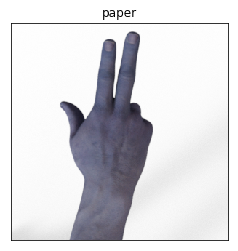

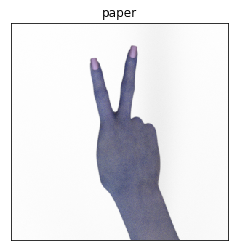

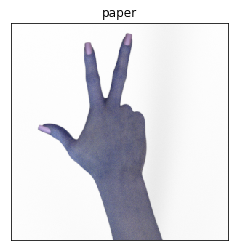

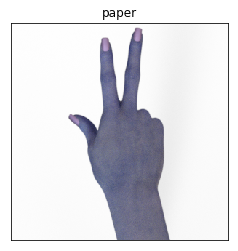

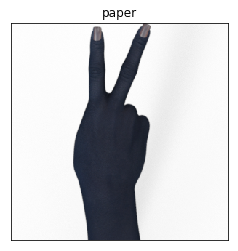

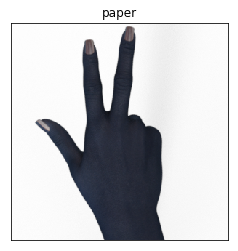

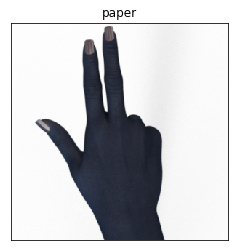

In [62]:
predict(DIR=train_file,model=model3)